# LAB 2 PART 2: Bonus Track Assignment 2: How much can you remember?

Author: Aliprandi Francesco

In [1]:
import matplotlib.pyplot as plt
import torch
from utils import read_data, distortion
from hopefield_net import HopfieldNet

In [2]:
X = read_data("alldigits/")
X = torch.stack([img.reshape(32, 32).T.reshape(1024) for img in X])

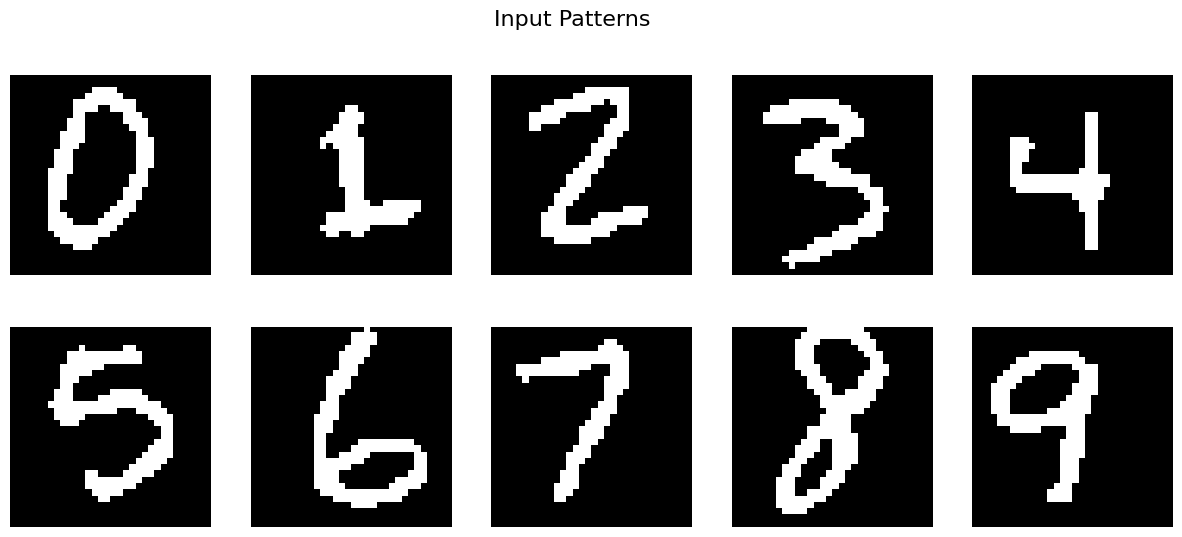

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

fig.suptitle('Input Patterns', fontsize=16)

for i, ax in enumerate(axs.flat):
    ax.imshow(X[i].reshape(32, 32), cmap='gray')
    ax.axis('off')

plt.show()

### Learning

In [4]:
# Learn first 3 digits
net = HopfieldNet(X[:3])

# Create distorted version of 0, 1, 2 with 0.05 noise
d_0 = distortion(X[0], 0.05).reshape(1,-1)
d_1 = distortion(X[1], 0.05).reshape(1,-1)
d_2 = distortion(X[2], 0.05).reshape(1,-1)

distortions = torch.cat((torch.cat((d_0, d_1), dim=0), d_2), dim=0)

In [5]:
def compute_avg_discrepancy(reconstructions, targets):
    """
    Compute average discrepancy distance (MSE) between reconstructions and targets
    """
    avg = 0
    for i in range(0,reconstructions.shape[0]):
        avg += torch.nn.functional.mse_loss(reconstructions[i], targets[i]).item()
    
    return avg / reconstructions.shape[0]

In [6]:
# Compute average discrepancy using MSE
avg_discrepancy = []
overlaps = {}
reconstructions = torch.zeros(X.shape)

for i in range(3,11):
    overlap = []
    
    # Reconstruct images
    for k in range(0,i):
        rec, _, ov = net.recall(distortions[k].squeeze(), X[k], 0.5)
        reconstructions[k] = rec
        overlap.append(ov)
        
    # Compute avergae discrepancy
    avg_discrepancy.append(compute_avg_discrepancy(reconstructions[:i-1], X[:i-1]))
    overlaps[i] = overlap
    
    if i == 10:
        break
    
    # Learn a new data pattern 
    print(f"Learning new pattern {i}...")

    net.incremental_learn(X[i].reshape(1,-1))
    
    # Distorte new data pattern
    dist_i = distortion(X[i], 0.05)
    distortions = torch.cat((distortions, dist_i.reshape(1,-1)), dim=0) 


Learning new pattern 3...
Learning new pattern 4...
Learning new pattern 5...
Learning new pattern 6...
Learning new pattern 7...
Learning new pattern 8...
Learning new pattern 9...


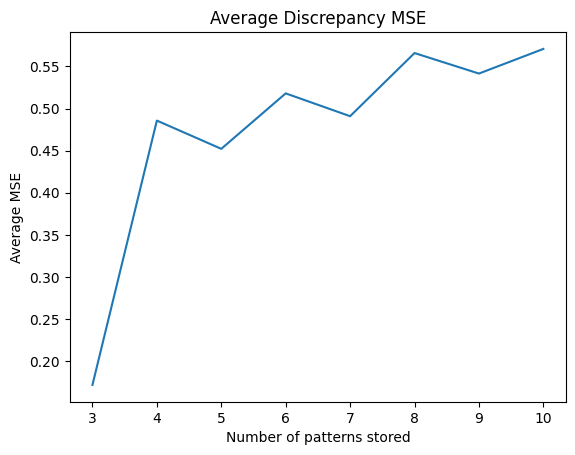

In [7]:
plt.plot(range(3, 11), avg_discrepancy)
plt.xlabel('Number of patterns stored')
plt.ylabel('Average MSE')
plt.title('Average Discrepancy MSE')
plt.savefig('plots/bonus_track/avg_discrepancy.png')
plt.show()

After the 3rd patterns arrives we can immediately observe a drop in average performance of the network

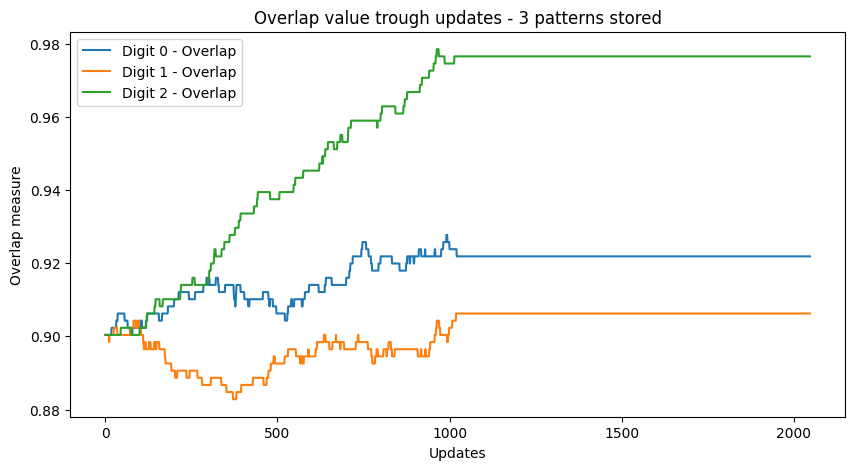

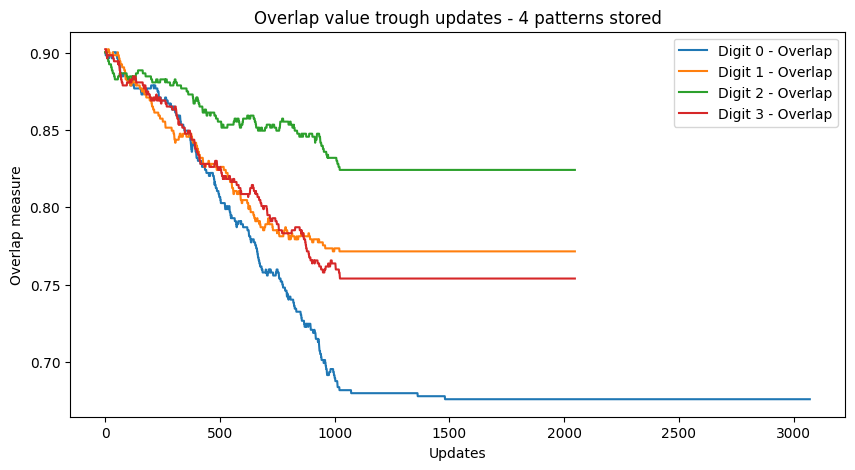

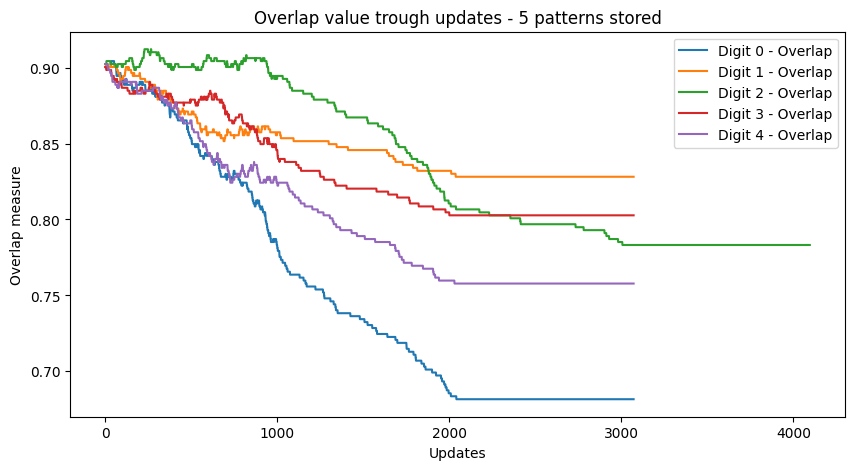

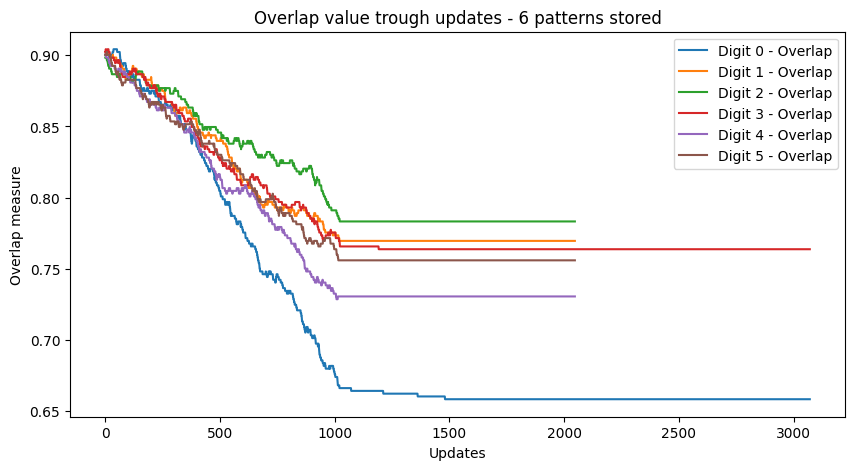

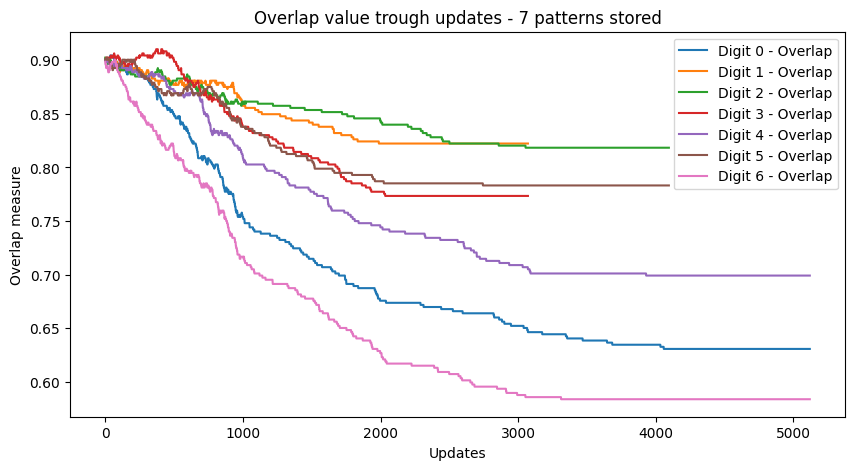

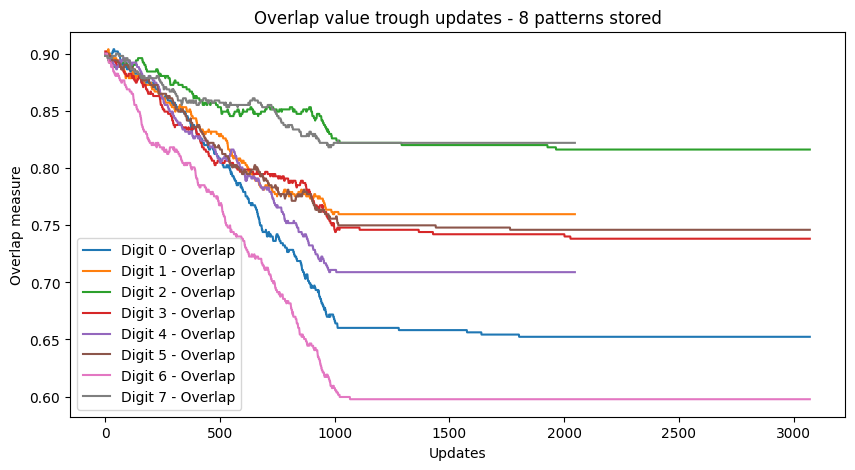

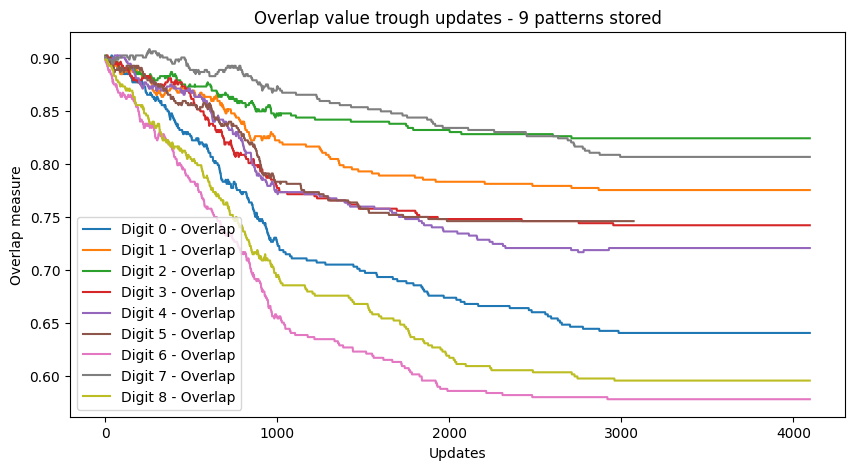

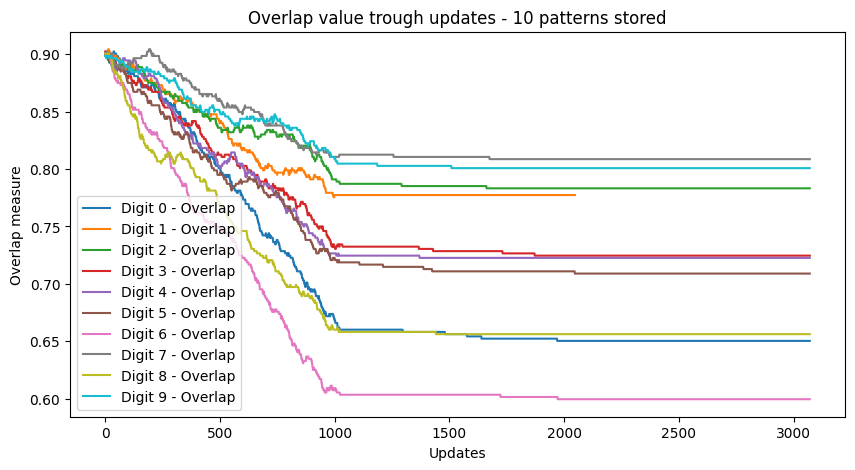

In [9]:
def plot_overlaps(overlap, patterns):
    plt.figure(figsize=(10,5))
    plt.title("Overlap value trough updates - " + str(patterns) + " patterns stored")
    plt.xlabel('Updates')
    plt.ylabel('Overlap measure')
    for i, ov in enumerate(overlap):
            plt.plot(ov, label=f'Digit {i} - Overlap')

    plt.legend()  
    plt.savefig(f'plots/bonus_track/overlap_with_{patterns}_digit.png')  
    plt.show
    return

for key, overlap in overlaps.items():
    plot_overlaps(overlap, key)